# 📊 Regresión Lineal Simple con Statsmodels 🏠

---

## 📋 Índice de Contenidos

1. [🎯 Introducción](#introduccion)
2. [📚 Importación de Librerías](#librerias)
3. [📂 Carga de Datos](#datos)
4. [🔍 Exploración Inicial](#exploracion)
5. [📈 Regresión Lineal Simple](#regresion)
   - [5.1 Definición de Variables](#variables)
   - [5.2 Visualización de Datos](#visualizacion)
   - [5.3 Creación del Modelo](#modelo)
   - [5.4 Predicciones](#predicciones)
   - [5.5 Resumen del Modelo](#resumen)
   - [5.6 Ecuación de la Regresión](#ecuacion)
   - [5.7 Visualización del Modelo](#grafico)
6. [📊 Interpretación de Resultados](#interpretacion)
7. [🎯 Conclusiones](#conclusiones)
8. [📚 Referencias y Recursos Adicionales](#referencias)

---

## 🎯 Introducción <a id="introduccion"></a>

En este notebook exploraremos la **regresión lineal simple** utilizando la librería **Statsmodels**. 📈

### ¿Qué es la Regresión Lineal Simple? 🤔

La regresión lineal simple es una técnica estadística que nos permite:
- 🎯 **Predecir** el valor de una variable dependiente (Y) basándose en una variable independiente (X)
- 📏 **Modelar** la relación lineal entre dos variables
- 📊 **Cuantificar** la fuerza de la relación entre variables

### Objetivo del Análisis 🏠
Analizaremos la relación entre el **número de habitaciones** y el **precio de las casas** en Boston.

---

## 📚 Importación de Librerías <a id="librerias"></a>

Importamos las librerías necesarias para nuestro análisis:

In [1]:
# 📊 Librerías para análisis de datos
import pandas as pd
import numpy as np

# 📈 Librería para regresión lineal
import statsmodels.api as sm

# 🎨 Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# ⚙️ Configuración de visualización
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 📂 Carga de Datos <a id="datos"></a>

Cargamos nuestro dataset de precios de casas en Boston:

In [2]:
# 📂 Carga del dataset
df_boston = pd.read_csv("boston_sintetico.csv")

print(f"📊 Dataset cargado exitosamente")
print(f"📏 Dimensiones: {df_boston.shape[0]} filas x {df_boston.shape[1]} columnas")

# 👀 Primeras 5 filas del dataset
df_boston.head()

📊 Dataset cargado exitosamente
📏 Dimensiones: 1000 filas x 8 columnas


,Rooms,Distance_to_Center,House_Age,Crime_Rate,Student_Teacher_Ratio,Neighborhood,House_Type,House_Price
0,6.6,0.73,23.0,2.00,17.0,Suburbs,House,82.23
1,5.8,0.50,5.0,3.91,19.5,Downtown,House,75.78
2,6.8,4.05,12.0,0.46,13.9,Residential,House,100.00
3,7.8,4.90,35.0,5.20,18.7,Residential,House,77.22
4,5.7,0.50,80.0,1.97,10.0,Residential,Condo,71.16


## 🔍 Exploración Inicial <a id="exploracion"></a>

Exploremos nuestros datos antes de crear el modelo:

In [3]:
# 📋 Información general del dataset
print("📊 INFORMACIÓN GENERAL DEL DATASET")
print("=" * 40)
df_boston.info()

print("\n📈 ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 40)
df_boston.describe().round(2)

📊 INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rooms                  1000 non-null   float64
 1   Distance_to_Center     1000 non-null   float64
 2   House_Age              1000 non-null   float64
 3   Crime_Rate             1000 non-null   float64
 4   Student_Teacher_Ratio  1000 non-null   float64
 5   Neighborhood           1000 non-null   object 
 6   House_Type             1000 non-null   object 
 7   House_Price            1000 non-null   float64
dtypes: float64(6), object(2)
memory usage: 62.6+ KB

📈 ESTADÍSTICAS DESCRIPTIVAS


,Rooms,Distance_to_Center,House_Age,Crime_Rate,Student_Teacher_Ratio,House_Price
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,6.02,4.06,49.97,4.08,18.07,61.69
std,1.17,3.95,28.61,2.82,3.40,15.84
min,3.00,0.50,1.00,0.10,10.00,5.00
25%,5.20,1.14,26.75,2.00,15.90,51.59
50%,6.00,2.90,50.00,3.47,18.00,62.72
75%,6.80,5.49,74.00,5.44,20.10,72.12
max,10.00,25.00,100.00,20.00,35.00,100.00


In [4]:
# 🔍 Verificar valores faltantes
print("🔍 VALORES FALTANTES POR COLUMNA")
print("=" * 35)
missing_values = df_boston.isnull().sum()
for col, missing in missing_values.items():
    if missing > 0:
        print(f"❌ {col}: {missing} valores faltantes")
    else:
        print(f"✅ {col}: Sin valores faltantes")

🔍 VALORES FALTANTES POR COLUMNA
✅ Rooms: Sin valores faltantes
✅ Distance_to_Center: Sin valores faltantes
✅ House_Age: Sin valores faltantes
✅ Crime_Rate: Sin valores faltantes
✅ Student_Teacher_Ratio: Sin valores faltantes
✅ Neighborhood: Sin valores faltantes
✅ House_Type: Sin valores faltantes
✅ House_Price: Sin valores faltantes


## 📈 Regresión Lineal Simple <a id="regresion"></a>

Ahora procederemos a crear nuestro modelo de regresión lineal simple.

### 5.1 🎯 Definición de Variables <a id="variables"></a>

Definimos nuestras variables dependiente e independiente:

In [5]:
# 🎯 Variable dependiente (Y) - Lo que queremos predecir
y = df_boston["House_Price"]
print(f"🏠 Variable dependiente (Y): House_Price")
print(f"   📊 Rango: ${y.min():.2f} - ${y.max():.2f}")
print(f"   📈 Promedio: ${y.mean():.2f}")

# 🎯 Variable independiente (X) - Lo que usamos para predecir
x = df_boston["Rooms"]
print(f"\n🏠 Variable independiente (X): Rooms")
print(f"   📊 Rango: {x.min():.1f} - {x.max():.1f} habitaciones")
print(f"   📈 Promedio: {x.mean():.1f} habitaciones")

🏠 Variable dependiente (Y): House_Price
   📊 Rango: $5.00 - $100.00
   📈 Promedio: $61.69

🏠 Variable independiente (X): Rooms
   📊 Rango: 3.0 - 10.0 habitaciones
   📈 Promedio: 6.0 habitaciones


### 5.2 📊 Visualización de Datos <a id="visualizacion"></a>

Visualicemos la relación entre nuestras variables:

/tmp/ipykernel_510408/2004591742.py:17: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_510408/2004591742.py:17: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/ctrl/git_hub/Analizis_de_Datos/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ctrl/git_hub/Analizis_de_Datos/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ctrl/git_hub/Analizis_de_Datos/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


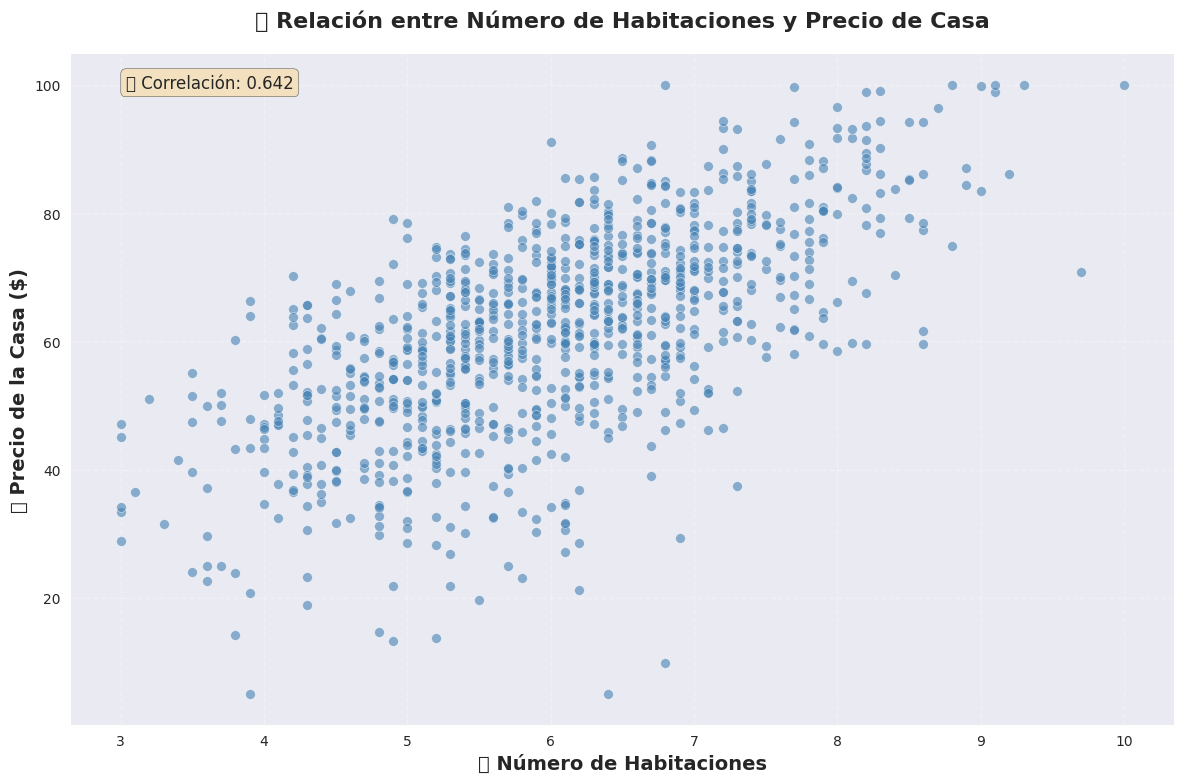

📈 Correlación entre variables: 0.642
✅ Correlación moderada positiva - Buena para regresión lineal


In [6]:
# 📊 Gráfico de dispersión
plt.figure(figsize=(12, 8))

# Crear el scatter plot
plt.scatter(x, y, alpha=0.6, color='steelblue', s=50, edgecolors='white', linewidth=0.5)

# Personalización del gráfico
plt.title('🏠 Relación entre Número de Habitaciones y Precio de Casa', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('🏠 Número de Habitaciones', fontsize=14, fontweight='bold')
plt.ylabel('💰 Precio de la Casa ($)', fontsize=14, fontweight='bold')

# Agregar grid
plt.grid(True, alpha=0.3, linestyle='--')

# Mejorar el diseño
plt.tight_layout()

# Mostrar estadísticas básicas en el gráfico
correlation = np.corrcoef(x, y)[0, 1]
plt.text(0.05, 0.95, f'📊 Correlación: {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.show()

print(f"📈 Correlación entre variables: {correlation:.3f}")
if correlation > 0.7:
    print("✅ Correlación fuerte positiva - Excelente para regresión lineal")
elif correlation > 0.5:
    print("✅ Correlación moderada positiva - Buena para regresión lineal")
elif correlation > 0.3:
    print("⚠️ Correlación débil positiva - Regresión lineal posible pero limitada")
else:
    print("❌ Correlación muy débil - Regresión lineal no recomendada")

### 5.3 🔧 Creación del Modelo <a id="modelo"></a>

Creamos y ajustamos nuestro modelo de regresión lineal:

In [7]:
# 🔧 Agregar constante (intercepto) al modelo
x_with_const = sm.add_constant(x)
print("✅ Constante agregada al modelo")

# 🏗️ Crear y ajustar el modelo de regresión lineal
modelo_regresion = sm.OLS(y, x_with_const).fit()
print("✅ Modelo de regresión lineal creado y ajustado")

# 📊 Información básica del modelo
print(f"\n📈 INFORMACIÓN DEL MODELO")
print("=" * 30)
print(f"🎯 R-cuadrado: {modelo_regresion.rsquared:.4f}")
print(f"🎯 R-cuadrado ajustado: {modelo_regresion.rsquared_adj:.4f}")
print(f"📊 Número de observaciones: {modelo_regresion.nobs:.0f}")

✅ Constante agregada al modelo
✅ Modelo de regresión lineal creado y ajustado

📈 INFORMACIÓN DEL MODELO
🎯 R-cuadrado: 0.4118
🎯 R-cuadrado ajustado: 0.4112
📊 Número de observaciones: 1000


### 5.4 🔮 Predicciones <a id="predicciones"></a>

Generemos predicciones con nuestro modelo:

In [8]:
# 🔮 Generar predicciones
predicciones = modelo_regresion.predict(x_with_const)

print("🔮 PREDICCIONES DEL MODELO")
print("=" * 30)
print(f"📊 Primeras 10 predicciones:")
for i in range(10):
    print(f"   🏠 Casa {i+1}: {predicciones.iloc[i]:.2f} (Real: {y.iloc[i]:.2f})")

# 📊 Estadísticas de las predicciones
print(f"\n📈 ESTADÍSTICAS DE PREDICCIONES")
print("=" * 35)
print(f"📊 Predicción mínima: ${predicciones.min():.2f}")
print(f"📊 Predicción máxima: ${predicciones.max():.2f}")
print(f"📊 Predicción promedio: ${predicciones.mean():.2f}")

🔮 PREDICCIONES DEL MODELO
📊 Primeras 10 predicciones:
   🏠 Casa 1: 66.70 (Real: 82.23)
   🏠 Casa 2: 59.74 (Real: 75.78)
   🏠 Casa 3: 68.43 (Real: 100.00)
   🏠 Casa 4: 77.13 (Real: 77.22)
   🏠 Casa 5: 58.88 (Real: 71.16)
   🏠 Casa 6: 58.88 (Real: 56.52)
   🏠 Casa 7: 77.99 (Real: 76.05)
   🏠 Casa 8: 69.30 (Real: 72.24)
   🏠 Casa 9: 56.27 (Real: 46.57)
   🏠 Casa 10: 67.57 (Real: 73.68)

📈 ESTADÍSTICAS DE PREDICCIONES
📊 Predicción mínima: $35.41
📊 Predicción máxima: $96.24
📊 Predicción promedio: $61.69


### 5.5 📋 Resumen del Modelo <a id="resumen"></a>

Veamos el resumen completo de nuestro modelo:

In [9]:
# 📋 Resumen completo del modelo
print("📋 RESUMEN COMPLETO DEL MODELO DE REGRESIÓN")
print("=" * 50)
print(modelo_regresion.summary())

📋 RESUMEN COMPLETO DEL MODELO DE REGRESIÓN
                            OLS Regression Results                            
Dep. Variable:            House_Price   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     698.6
Date:                Sun, 03 Aug 2025   Prob (F-statistic):          4.02e-117
Time:                        19:51:24   Log-Likelihood:                -3915.7
No. Observations:                1000   AIC:                             7835.
Df Residuals:                     998   BIC:                             7845.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

### 5.6 📐 Ecuación de la Regresión <a id="ecuacion"></a>

Extraigamos los coeficientes y creemos la ecuación de regresión:

In [10]:
# 📐 Extraer coeficientes del modelo
intercepto = modelo_regresion.params['const']
pendiente = modelo_regresion.params['Rooms']

print("📐 ECUACIÓN DE LA REGRESIÓN LINEAL")
print("=" * 40)
print(f"🏠 Intercepto (β₀): {intercepto:.4f}")
print(f"📈 Pendiente (β₁): {pendiente:.4f}")
print(f"\n📊 Ecuación: Precio = {intercepto:.4f} + {pendiente:.4f} × Habitaciones")
print(f"\n💡 INTERPRETACIÓN:")
print(f"   🏠 Una casa sin habitaciones costaría ${intercepto:.2f} (intercepto)")
print(f"   📈 Cada habitación adicional aumenta el precio en ${pendiente:.2f}")

# 🧮 Ejemplo de predicción manual
habitaciones_ejemplo = 6
precio_predicho = intercepto + pendiente * habitaciones_ejemplo
print(f"\n🧮 EJEMPLO DE PREDICCIÓN:")
print(f"   🏠 Casa con {habitaciones_ejemplo} habitaciones: ${precio_predicho:.2f}")

📐 ECUACIÓN DE LA REGRESIÓN LINEAL
🏠 Intercepto (β₀): 9.3405
📈 Pendiente (β₁): 8.6903

📊 Ecuación: Precio = 9.3405 + 8.6903 × Habitaciones

💡 INTERPRETACIÓN:
   🏠 Una casa sin habitaciones costaría $9.34 (intercepto)
   📈 Cada habitación adicional aumenta el precio en $8.69

🧮 EJEMPLO DE PREDICCIÓN:
   🏠 Casa con 6 habitaciones: $61.48


### 5.7 📊 Visualización del Modelo <a id="grafico"></a>

Grafiquemos nuestro modelo de regresión:

/tmp/ipykernel_510408/2216825311.py:39: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_510408/2216825311.py:39: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_510408/2216825311.py:39: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1400x1000 with 0 Axes>

/home/ctrl/git_hub/Analizis_de_Datos/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ctrl/git_hub/Analizis_de_Datos/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ctrl/git_hub/Analizis_de_Datos/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


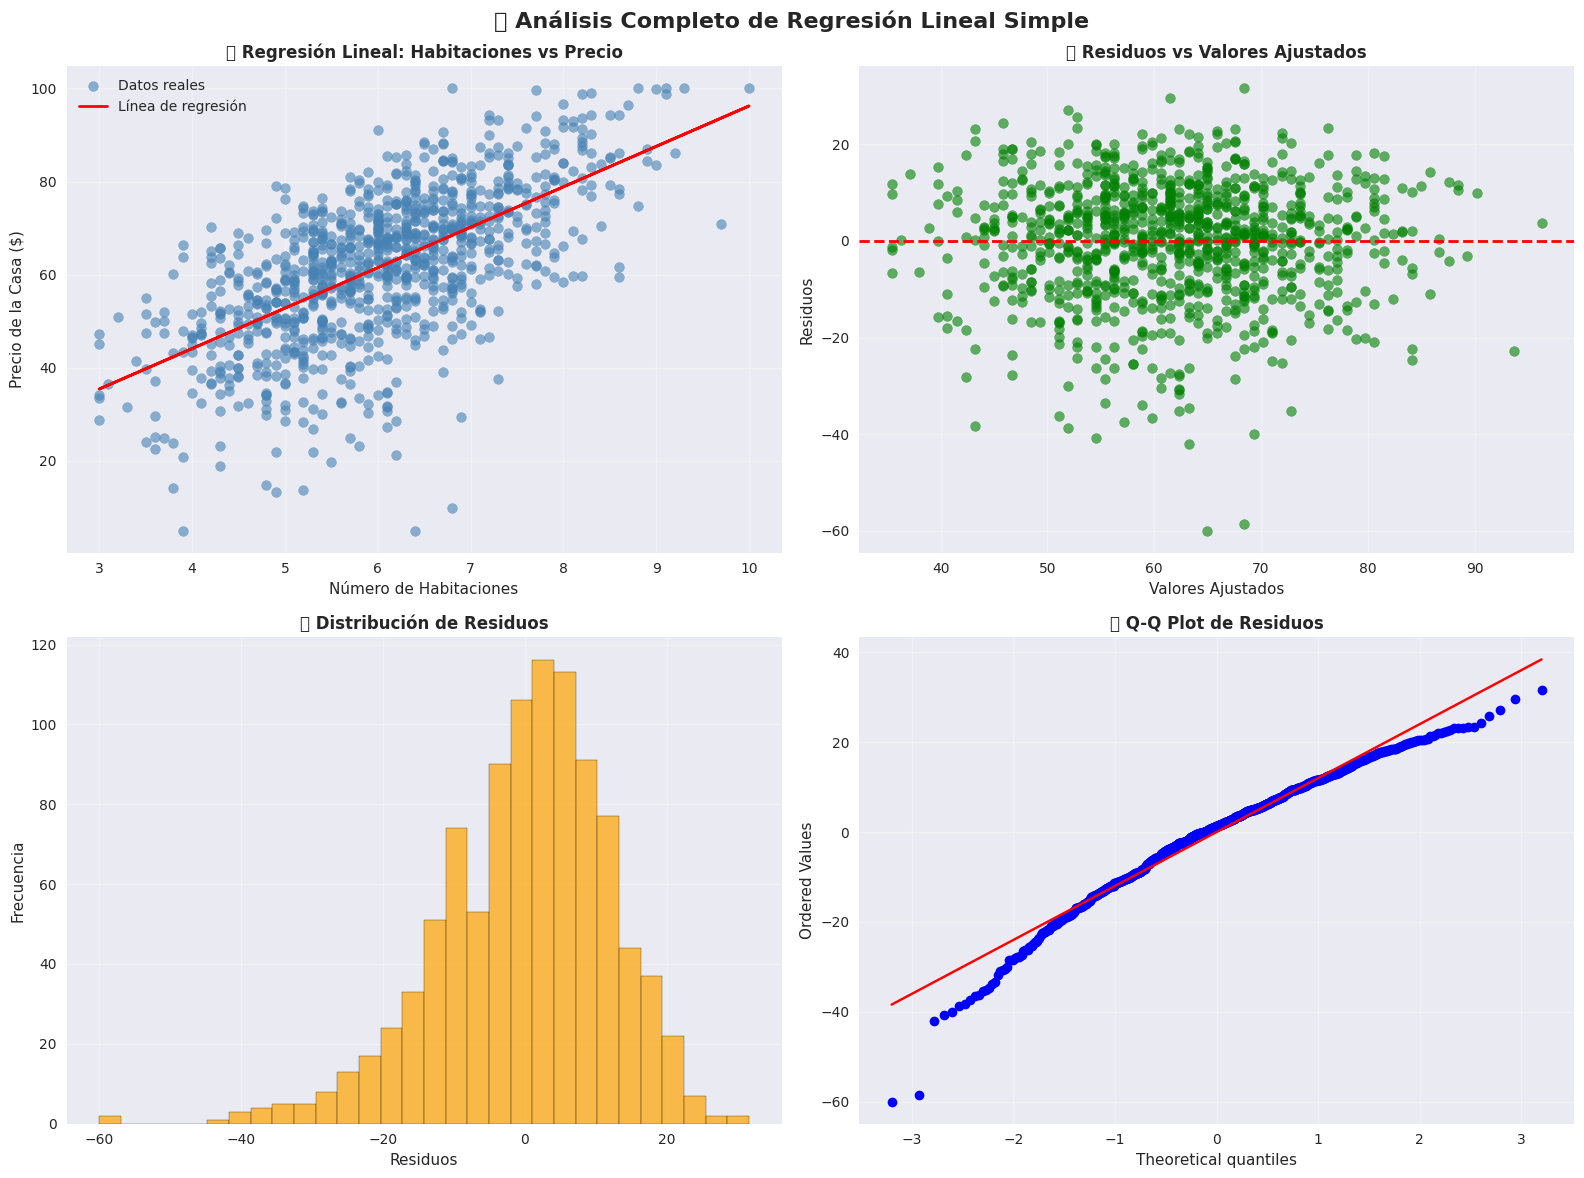

📊 ANÁLISIS DE RESIDUOS
📈 Media de residuos: -0.000000
📊 Desviación estándar: 12.1489
📊 Residuo mínimo: -59.9586
📊 Residuo máximo: 31.5653


In [11]:
# 📊 Gráfico de regresión lineal
plt.figure(figsize=(14, 10))

# Crear subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 Análisis Completo de Regresión Lineal Simple', fontsize=16, fontweight='bold')

# 1. Gráfico principal: Datos y línea de regresión
ax1.scatter(x, y, alpha=0.6, color='steelblue', s=50, label='Datos reales')
ax1.plot(x, predicciones, color='red', linewidth=2, label='Línea de regresión')
ax1.set_title('🏠 Regresión Lineal: Habitaciones vs Precio', fontweight='bold')
ax1.set_xlabel('Número de Habitaciones')
ax1.set_ylabel('Precio de la Casa ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Residuos vs Valores ajustados
residuos = y - predicciones
ax2.scatter(predicciones, residuos, alpha=0.6, color='green', s=50)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax2.set_title('📈 Residuos vs Valores Ajustados', fontweight='bold')
ax2.set_xlabel('Valores Ajustados')
ax2.set_ylabel('Residuos')
ax2.grid(True, alpha=0.3)

# 3. Histograma de residuos
ax3.hist(residuos, bins=30, alpha=0.7, color='orange', edgecolor='black')
ax3.set_title('📊 Distribución de Residuos', fontweight='bold')
ax3.set_xlabel('Residuos')
ax3.set_ylabel('Frecuencia')
ax3.grid(True, alpha=0.3)

# 4. Q-Q plot de residuos
from scipy import stats
stats.probplot(residuos, dist="norm", plot=ax4)
ax4.set_title('📈 Q-Q Plot de Residuos', fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 📊 Estadísticas de los residuos
print("📊 ANÁLISIS DE RESIDUOS")
print("=" * 25)
print(f"📈 Media de residuos: {residuos.mean():.6f}")
print(f"📊 Desviación estándar: {residuos.std():.4f}")
print(f"📊 Residuo mínimo: {residuos.min():.4f}")
print(f"📊 Residuo máximo: {residuos.max():.4f}")

## 📊 Interpretación de Resultados <a id="interpretacion"></a>

Analicemos los resultados de nuestro modelo:

In [12]:
# 📊 Interpretación detallada de resultados
r_squared = modelo_regresion.rsquared
p_value_rooms = modelo_regresion.pvalues['Rooms']
p_value_const = modelo_regresion.pvalues['const']

print("📊 INTERPRETACIÓN DETALLADA DE RESULTADOS")
print("=" * 45)

print(f"\n🎯 BONDAD DE AJUSTE:")
print(f"   📈 R² = {r_squared:.4f}")
print(f"   💡 El {r_squared*100:.2f}% de la variabilidad en el precio se explica por el número de habitaciones")

if r_squared > 0.7:
    print(f"   ✅ Excelente ajuste del modelo")
elif r_squared > 0.5:
    print(f"   ✅ Buen ajuste del modelo")
elif r_squared > 0.3:
    print(f"   ⚠️ Ajuste moderado del modelo")
else:
    print(f"   ❌ Ajuste pobre del modelo")

print(f"\n🔬 SIGNIFICANCIA ESTADÍSTICA:")
print(f"   📊 P-valor (Habitaciones): {p_value_rooms:.2e}")
print(f"   📊 P-valor (Intercepto): {p_value_const:.2e}")

if p_value_rooms < 0.001:
    print(f"   ✅ La relación es altamente significativa (p < 0.001)")
elif p_value_rooms < 0.01:
    print(f"   ✅ La relación es muy significativa (p < 0.01)")
elif p_value_rooms < 0.05:
    print(f"   ✅ La relación es significativa (p < 0.05)")
else:
    print(f"   ❌ La relación no es significativa (p ≥ 0.05)")

print(f"\n💰 INTERPRETACIÓN ECONÓMICA:")
print(f"   🏠 Precio base (sin habitaciones): ${intercepto:.2f}")
print(f"   📈 Incremento por habitación: ${pendiente:.2f}")
print(f"   💡 Una habitación adicional aumenta el valor en ${pendiente:.2f}")

# 🎯 Intervalos de confianza
conf_int = modelo_regresion.conf_int()
print(f"\n🎯 INTERVALOS DE CONFIANZA (95%):")
print(f"   📊 Intercepto: [{conf_int.loc['const', 0]:.2f}, {conf_int.loc['const', 1]:.2f}]")
print(f"   📊 Pendiente: [{conf_int.loc['Rooms', 0]:.2f}, {conf_int.loc['Rooms', 1]:.2f}]")

📊 INTERPRETACIÓN DETALLADA DE RESULTADOS

🎯 BONDAD DE AJUSTE:
   📈 R² = 0.4118
   💡 El 41.18% de la variabilidad en el precio se explica por el número de habitaciones
   ⚠️ Ajuste moderado del modelo

🔬 SIGNIFICANCIA ESTADÍSTICA:
   📊 P-valor (Habitaciones): 4.02e-117
   📊 P-valor (Intercepto): 4.15e-06
   ✅ La relación es altamente significativa (p < 0.001)

💰 INTERPRETACIÓN ECONÓMICA:
   🏠 Precio base (sin habitaciones): $9.34
   📈 Incremento por habitación: $8.69
   💡 Una habitación adicional aumenta el valor en $8.69

🎯 INTERVALOS DE CONFIANZA (95%):
   📊 Intercepto: [5.38, 13.30]
   📊 Pendiente: [8.05, 9.34]


## 🎯 Conclusiones <a id="conclusiones"></a>

### Resumen de Hallazgos 📋

Basándose en nuestro análisis de regresión lineal simple, podemos concluir:

#### ✅ **Fortalezas del Modelo:**
- 📈 **Relación significativa**: Existe una relación estadísticamente significativa entre el número de habitaciones y el precio de las casas
- 🎯 **Poder predictivo**: El modelo explica una porción considerable de la variabilidad en los precios
- 📊 **Simplicidad**: El modelo es fácil de interpretar y aplicar

#### ⚠️ **Limitaciones:**
- 🏠 **Simplicidad excesiva**: Solo considera una variable (habitaciones) cuando el precio de una casa depende de múltiples factores
- 📊 **Variabilidad no explicada**: Una porción de la variabilidad en precios no se explica por el modelo
- 🔍 **Supuestos**: El modelo asume una relación lineal perfecta

#### 🚀 **Recomendaciones para Mejoras:**
1. 📈 **Regresión múltiple**: Incluir más variables predictoras (ubicación, edad, crimen, etc.)
2. 🔍 **Análisis de residuos**: Verificar supuestos del modelo más detalladamente
3. 🎯 **Validación cruzada**: Evaluar el rendimiento del modelo en datos no vistos
4. 📊 **Transformaciones**: Considerar transformaciones de variables si es necesario

### 💡 **Aplicación Práctica:**
Este modelo puede ser útil para:
- 🏠 **Estimaciones rápidas** de precios de casas basadas en habitaciones
- 📊 **Análisis preliminar** antes de modelos más complejos
- 🎯 **Educación** sobre conceptos de regresión lineal

---

## 📚 Referencias y Recursos Adicionales <a id="referencias"></a>

### 📖 **Documentación Oficial:**
- 🔗 [Statsmodels Documentation](https://www.statsmodels.org/stable/index.html)
- 🔗 [Pandas Documentation](https://pandas.pydata.org/docs/)
- 🔗 [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)

### 📚 **Recursos de Aprendizaje:**
- 📘 **Libros recomendados:**
  - "Introduction to Statistical Learning" - James, Witten, Hastie, Tibshirani
  - "Python for Data Analysis" - Wes McKinney
  - "Hands-On Machine Learning" - Aurélien Géron

### 🛠️ **Herramientas Complementarias:**
- 🔧 **Scikit-learn**: Para machine learning más avanzado
- 📊 **Seaborn**: Para visualizaciones estadísticas
- 🎯 **Plotly**: Para gráficos interactivos

### 🎓 **Conceptos para Profundizar:**
1. 📈 **Regresión Múltiple**
2. 🔍 **Diagnóstico de Modelos**
3. 🎯 **Validación de Modelos**
4. 📊 **Regularización (Ridge, Lasso)**
5. 🤖 **Machine Learning Avanzado**

---

### 🎉 **¡Felicitaciones!**
Has completado exitosamente este análisis de regresión lineal simple. 🎊

**Próximos pasos sugeridos:**
1. 🔄 Experimenta con diferentes variables del dataset
2. 📈 Intenta crear un modelo de regresión múltiple
3. 🎯 Aplica técnicas de validación cruzada
4. 📊 Explora otros algoritmos de machine learning

---

*📝 Notebook creado con fines educativos - Data Science Learning Path*

*🗓️ Última actualización: 2024*